# Predicting sentiment from product reviews

### Due: Wednesday, April 25th, at 11:59 pm on Canvas

The goal of this first notebook is to explore logistic regression and feature engineering with sklearn.

In this notebook you will use product review data from Amazon.com to predict whether the sentiments about a product (from its reviews) are positive or negative.

* Use Pandas Dataframe to do some feature engineering
* Train a logistic regression model to predict the sentiment of product reviews.
* Inspect the weights (coefficients) of a trained logistic regression model.
* Make a prediction (both class and probability) of sentiment for a new product review.
* Given the logistic regression weights, predictors and ground truth labels, write a function to compute the **accuracy** of the model.
* Inspect the coefficients of the logistic regression model and interpret their meanings.
* Compare multiple logistic regression models.

Copyright ©2018 Emily Fox.  All rights reserved.  Permission is hereby granted to students registered for University of Washington CSE/STAT 416 for use solely during Spring Quarter 2019 for purposes of the course.  No other use, copying, distribution, or modification is permitted without prior written consent. Copyrights for third-party components of this work must be honored.  Instructors interested in reusing these course materials should contact the author.


In [1]:
from __future__ import division
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
import pandas as pd
import math
import string
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data preperation

We will use a dataset consisting of baby product reviews on Amazon.com.

In [2]:
products = pd.read_csv('/data/amazon_baby_subset.csv')
products = products.iloc[200:700]
products

,name,review,rating
200,"Summer Infant Ultimate Crib Sheet, 52&quot; x ...",I received 2 of these sheets as a gift after m...,5
201,"Summer Infant Ultimate Crib Sheet, 52&quot; x ...",This item posses a chocking hazzard. I woke up...,1
202,Basic Comfort Handy's Plus Pad Full,I was looking for a nightime waterproof pad fo...,5
203,"Summer Infant, Ultimate Training Pad - Twin Ma...",Great Product ... Highly Recommend! No more ch...,5
204,"Summer Infant, Ultimate Training Pad - Twin Ma...","It does the job of protecting the mattress, th...",4
205,"Summer Infant, Ultimate Training Pad - Twin Ma...",This works great and covers plenty of space ar...,4
206,"Summer Infant, Ultimate Training Pad - Twin Ma...",this item was terrible it shribled up so much....,1
207,"Summer Infant, Ultimate Training Pad - Twin Ma...",Washes well and is wider than the other brand ...,5
208,"Summer Infant, Ultimate Training Pad - Twin Ma...",Love this product! It really absorbs well and...,5
209,"Summer Infant, Ultimate Training Pad - Twin Ma...",Works great!! Stays in place on the bed. Never...,5


## Extract sentiments

We will **ignore** all reviews with *rating = 3*, since they tend to have a neutral sentiment.

In [3]:
products = products[products['rating'] != 3]
len(products)

500

Now, we will assign reviews with a rating of 4 or higher to be *positive* reviews, while the ones with rating of 2 or lower are *negative*. For the sentiment column, we use +1 for the positive class label and -1 for the negative class label.

In [4]:
products['sentiment'] = products['rating'].apply(lambda rating : +1 if rating > 3 else -1)
products[0:10]

,name,review,rating,sentiment
200,"Summer Infant Ultimate Crib Sheet, 52&quot; x ...",I received 2 of these sheets as a gift after m...,5,1
201,"Summer Infant Ultimate Crib Sheet, 52&quot; x ...",This item posses a chocking hazzard. I woke up...,1,-1
202,Basic Comfort Handy's Plus Pad Full,I was looking for a nightime waterproof pad fo...,5,1
203,"Summer Infant, Ultimate Training Pad - Twin Ma...",Great Product ... Highly Recommend! No more ch...,5,1
204,"Summer Infant, Ultimate Training Pad - Twin Ma...","It does the job of protecting the mattress, th...",4,1
205,"Summer Infant, Ultimate Training Pad - Twin Ma...",This works great and covers plenty of space ar...,4,1
206,"Summer Infant, Ultimate Training Pad - Twin Ma...",this item was terrible it shribled up so much....,1,-1
207,"Summer Infant, Ultimate Training Pad - Twin Ma...",Washes well and is wider than the other brand ...,5,1
208,"Summer Infant, Ultimate Training Pad - Twin Ma...",Love this product! It really absorbs well and...,5,1
209,"Summer Infant, Ultimate Training Pad - Twin Ma...",Works great!! Stays in place on the bed. Never...,5,1


Now, we can see that the dataset contains an extra column called **sentiment** which is either positive (+1) or negative (-1).

## Build the word count vector for each review

Let us explore a specific example of a baby product.

In [5]:
products.iloc[21]

name                        Odorless Diaper Pail by Safety 1st
review       I've found that the Odor-Less Diaper Pail is n...
rating                                                       1
sentiment                                                   -1
Name: 221, dtype: object

Now, we will perform 2 simple data transformations:

1. Remove punctuation using [Python's built-in](https://docs.python.org/2/library/string.html) string functionality.
2. Transform the reviews into word-counts.

**Aside**. In this assignment, we remove all punctuations for the sake of simplicity. A smarter approach to punctuations would preserve phrases such as "I'd", "would've", "hadn't" and so forth. See [this page](ftp://ftp.cis.upenn.edu/pub/treebank/public_html/tokenization.html) for an example of smart handling of punctuations.

In [6]:
def remove_punctuation(text):
    if type(text) != str:
        return ''
    return text.translate(str.maketrans('', '', string.punctuation))

products['review_clean'] = products['review'].apply(remove_punctuation)

Now, let us explore what the sample example above looks like after these 2 transformations.

In [7]:
print(products['review'].iloc[1])
print()
print(products['review_clean'].iloc[1])

This item posses a chocking hazzard. I woke up to my 6 month old gagging on the elastic strap that holds the sheet to the crib. While it may seem like a wonderful invention (oh how i miss it!) I don't think it's worth the risk.

This item posses a chocking hazzard I woke up to my 6 month old gagging on the elastic strap that holds the sheet to the crib While it may seem like a wonderful invention oh how i miss it I dont think its worth the risk


In [8]:
word_count = []

for i in range(0,len(products)):
    word_count_dict = {}
    review_clean = products['review_clean'].iloc[i]
    review_clean = review_clean.split(' ')
    for word in review_clean:
        if word in word_count_dict.keys():
            word_count_dict[word] += 1
        else:
            word_count_dict[word] = 1
    word_count.append(word_count_dict)

products['word_count'] = word_count

In [29]:
#to create a bag of words from the dict
dictVectorizer = DictVectorizer()
features_Frame = dictVectorizer.fit_transform(products['word_count'])
# print(features_Frame)

  (0, 0)	6.0
  (0, 30)	2.0
  (0, 51)	1.0
  (0, 445)	5.0
  (0, 476)	2.0
  (0, 552)	1.0
  (0, 599)	1.0
  (0, 928)	1.0
  (0, 933)	1.0
  (0, 1006)	1.0
  (0, 1021)	1.0
  (0, 1032)	1.0
  (0, 1053)	2.0
  (0, 1097)	1.0
  (0, 1114)	1.0
  (0, 1229)	1.0
  (0, 1297)	1.0
  (0, 1416)	1.0
  (0, 1421)	1.0
  (0, 1476)	2.0
  (0, 1526)	1.0
  (0, 1770)	1.0
  (0, 1846)	1.0
  (0, 2002)	1.0
  (0, 2064)	1.0
  :	:
  (499, 4124)	1.0
  (499, 4213)	2.0
  (499, 4216)	1.0
  (499, 4241)	1.0
  (499, 4247)	2.0
  (499, 4339)	1.0
  (499, 4387)	1.0
  (499, 4472)	1.0
  (499, 4491)	1.0
  (499, 4546)	1.0
  (499, 4547)	1.0
  (499, 4548)	9.0
  (499, 4568)	1.0
  (499, 4578)	1.0
  (499, 4587)	1.0
  (499, 4619)	1.0
  (499, 4622)	1.0
  (499, 4642)	6.0
  (499, 4713)	1.0
  (499, 4831)	1.0
  (499, 4859)	1.0
  (499, 4895)	1.0
  (499, 4974)	1.0
  (499, 5008)	1.0
  (499, 5041)	1.0


In [31]:
product_data = pd.DataFrame(features_Frame.toarray())
product_data['sentiment'] = list(products['sentiment'])
product_data.head()

,0,1,2,3,4,5,6,7,8,9,...,5079,5080,5081,5082,5083,5084,5085,5086,5087,sentiment
0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


## Split data into training and test sets

Let's perform a train/test split with 80% of the data in the training set and 20% of the data in the test set. We use `random_state = 1` so that everyone gets the same result.

In [11]:
train_data, test_data = train_test_split(product_data, test_size = 0.2, random_state = 1)
train_products, test_products = train_test_split(products, test_size = 0.2, random_state = 1)
print (len(train_data))
print (len(test_data))

400
100


## Baseline: Majority class prediction

It is quite common to use the **majority class classifier** as the a baseline (or reference) model for comparison with your classifier model. The majority classifier model predicts the majority class for all data points. At the very least, you should healthily beat the majority class classifier, otherwise, the model is (usually) pointless.

What is the majority class in the **train_data**?

In [12]:
num_positive  = (train_data['sentiment'] == +1).sum()
num_negative = (train_data['sentiment'] == -1).sum()
print (num_positive)
print (num_negative)

154
246


Now compute the accuracy of the majority class classifier on **test_data**.

**Quiz Question**: Enter the accuracy of the majority class classifier model on the **test_data**. Round your answer to two decimal places (e.g. 0.76). Answer: 0.63

In [73]:
n = (test_data['sentiment'] == -1).sum()
accuracy = n / len(test_data)
print(accuracy)

0.63


# Train a sentiment classifier with logistic regression

We will now use logistic regression to create a sentiment classifier on the training data. This model will use the column **word_count** as a feature and the column **sentiment** as the target. We will set **no regularization penalty** and set `random_state = 1` to get the same answer as everyone else.

**Note:** This line may take a few minutes.

In [49]:
features = list(train_data.columns)
features.remove('sentiment')
#Note: C = 1/Lambda. Setting C to a really high value is the same as setting lambda = 0
sentiment_model = LogisticRegression(penalty='l2', random_state = 1, C = 100000000000000000000000)
sentiment_model.fit(train_data[features], train_data['sentiment'])

LogisticRegression(C=100000000000000000000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=1,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [37]:
weights = sentiment_model.coef_ #some versions might require coef_[0]
print(weights)

[[ 0.1852612  -0.23249906 -0.08129827 ...  0.          0.
   0.28013838]]


Fill in the following block of code to calculate how many *weights* are non negative ( >= 0).

In [38]:
len(weights[weights>=0])

2787

**Quiz question:** How many weights are >= 0? Answer: 2787

## Making predictions with logistic regression

Now that a model is trained, we can make predictions on the **test data**. In this section, we will explore this in the context of 3 examples in the test dataset.  We refer to this set of 3 examples as the **sample_test_data**.

In [39]:
sample_test_data = test_data[10:13]
sample_test_data

,0,1,2,3,4,5,6,7,8,9,...,5079,5080,5081,5082,5083,5084,5085,5086,5087,sentiment
322,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
168,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1
119,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1


### Predicting sentiment


In [40]:
print ("Probability predictions on the sample test data:")
print('Negative Sentiment  Positive Sentiment')
print(sentiment_model.predict_proba(sample_test_data[features]))

Probability predictions on the sample test data:
Negative Sentiment  Positive Sentiment
[[9.89168127e-01 1.08318733e-02]
 [9.99999987e-01 1.30360701e-08]
 [1.00000000e+00 2.87866583e-23]]


In [41]:
print(sentiment_model.predict(sample_test_data[features]))

[-1 -1 -1]


# Find the most positive (and negative) review

We now turn to examining the full test dataset <span style="color:red">(not sample_test_data)</span>, **test_data**, and use Sklearn to form predictions on all of the test data points for faster performance.

Using the `sentiment_model`, find the **first** review in the entire **test_data** with the **highest probability** of being classified as a **positive review**. We refer to this as the "most positive review."

In [59]:
prob = sentiment_model.predict_proba(test_data[features])
# print("Probability predictions on the test data:")
# print(prob)
positive_prob = [i[1] for i in prob]
positive_index = positive_prob.index(max(positive_prob))
negative_prob = [i[0] for i in prob]
negative_index = negative_prob.index(max(negative_prob))

Read the reviews using the .iloc[] function on test_products

In [61]:
test_products.iloc[positive_index] #Graco TotBloc Pack 'N Play with Carry Bag
test_products.iloc[negative_index] #Safety 1st Deluxe 4-in-1 Bath Station

name                        Safety 1st Deluxe 4-in-1 Bath Station
review          This tub is very hard to set up and I had to t...
rating                                                          1
sentiment                                                      -1
review_clean    This tub is very hard to set up and I had to t...
word_count      {'This': 2, 'tub': 8, 'is': 7, 'very': 1, 'har...
Name: 319, dtype: object

**Quiz Question**: Which of the following products has the most positive review?  [multiple choice]  
**Quiz Question**: Which of the following products has the most negative review?  [multiple choice]

## Compute accuracy of the classifier

We will now evaluate the accuracy of the trained classifer. Recall that the accuracy is given by


$$
\mbox{accuracy} = \frac{\mbox{# correctly classified examples}}{\mbox{# total examples}}
$$

This can be computed as follows:

* **Step 1:** Use the trained model to compute class predictions (**Hint:** Use the `predict` method)
* **Step 2:** Count the number of data points when the predicted class labels match the ground truth labels (called `true_labels` below).
* **Step 3:** Divide the total number of correct predictions by the total number of data points in the dataset.


<span style="color:red">Note that `true_labels` is a **data frame**. If you need to access the `i`-th true label, you would do `true_labels.iloc[i]`.

In [62]:
def get_classification_accuracy(model, data, true_labels):
    #complete this function
    prediction = model.predict(data)
    count = 0
    for i in range(len(prediction)):
        if prediction[i] == true_labels.iloc[i]:
            count += 1
    accuracy = count/len(data)
        
    return accuracy #do not delete this line

Now, let's compute the classification accuracy of the **sentiment_model** on the **test_data**.

In [64]:
get_classification_accuracy(sentiment_model, test_data[features], test_data['sentiment'])

0.82

**Quiz Question**: What is the accuracy of the **sentiment_model** on the **test_data**? Round your answer to 2 decimal places (e.g. 0.76).

**Quiz Question**: Which of the following products has the most negative review?  [multiple choice]

**Quiz Question**: Should we use the **sentiment_model** or the **majority class classifier (the baseline model)**?

### Logistic Regression with L2 regularization

We compiled a list of 193 most frequent words into the JSON file named important_words.json. Load the words into a list important_words. We're going to load them in and create column with the count for each of the words. We're doing this so that we can observe the effect of L2 regularization on the features.

In [65]:
# Split out the words into individual columns
import json
with open('/data/important_words.json', 'r') as f: # Reads the list of most frequent words
    important_words = json.load(f)
important_words = [str(s) for s in important_words]

important_words

['baby',
 'one',
 'great',
 'love',
 'use',
 'would',
 'like',
 'easy',
 'little',
 'seat',
 'old',
 'well',
 'get',
 'also',
 'really',
 'son',
 'time',
 'bought',
 'product',
 'good',
 'daughter',
 'much',
 'loves',
 'stroller',
 'put',
 'months',
 'car',
 'still',
 'back',
 'used',
 'recommend',
 'first',
 'even',
 'perfect',
 'nice',
 'bag',
 'two',
 'using',
 'got',
 'fit',
 'around',
 'diaper',
 'enough',
 'month',
 'price',
 'go',
 'could',
 'soft',
 'since',
 'buy',
 'room',
 'works',
 'made',
 'child',
 'keep',
 'size',
 'small',
 'need',
 'year',
 'big',
 'make',
 'take',
 'easily',
 'think',
 'crib',
 'clean',
 'way',
 'quality',
 'thing',
 'better',
 'without',
 'set',
 'new',
 'every',
 'cute',
 'best',
 'bottles',
 'work',
 'purchased',
 'right',
 'lot',
 'side',
 'happy',
 'comfortable',
 'toy',
 'able',
 'kids',
 'bit',
 'night',
 'long',
 'fits',
 'see',
 'us',
 'another',
 'play',
 'day',
 'money',
 'monitor',
 'tried',
 'thought',
 'never',
 'item',
 'hard',
 'plasti

In [66]:
for word in important_words:
    products[word] = products['review_clean'].apply(lambda s : s.split().count(word))
products

,name,review,rating,sentiment,review_clean,word_count,baby,one,great,love,...,seems,picture,completely,wish,buying,babies,won,tub,almost,either
200,"Summer Infant Ultimate Crib Sheet, 52&quot; x ...",I received 2 of these sheets as a gift after m...,5,1,I received 2 of these sheets as a gift after m...,"{'I': 5, 'received': 1, '2': 2, 'of': 2, 'thes...",0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
201,"Summer Infant Ultimate Crib Sheet, 52&quot; x ...",This item posses a chocking hazzard. I woke up...,1,-1,This item posses a chocking hazzard I woke up ...,"{'This': 1, 'item': 1, 'posses': 1, 'a': 2, 'c...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202,Basic Comfort Handy's Plus Pad Full,I was looking for a nightime waterproof pad fo...,5,1,I was looking for a nightime waterproof pad fo...,"{'I': 2, 'was': 1, 'looking': 2, 'for': 2, 'a'...",0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
203,"Summer Infant, Ultimate Training Pad - Twin Ma...",Great Product ... Highly Recommend! No more ch...,5,1,Great Product Highly Recommend No more changi...,"{'Great': 1, 'Product': 1, '': 1, 'Highly': 1,...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
204,"Summer Infant, Ultimate Training Pad - Twin Ma...","It does the job of protecting the mattress, th...",4,1,It does the job of protecting the mattress the...,"{'It': 1, 'does': 1, 'the': 10, 'job': 1, 'of'...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205,"Summer Infant, Ultimate Training Pad - Twin Ma...",This works great and covers plenty of space ar...,4,1,This works great and covers plenty of space ar...,"{'This': 1, 'works': 1, 'great': 1, 'and': 1, ...",0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
206,"Summer Infant, Ultimate Training Pad - Twin Ma...",this item was terrible it shribled up so much....,1,-1,this item was terrible it shribled up so muchN...,"{'this': 1, 'item': 1, 'was': 1, 'terrible': 1...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207,"Summer Infant, Ultimate Training Pad - Twin Ma...",Washes well and is wider than the other brand ...,5,1,Washes well and is wider than the other brand ...,"{'Washes': 1, 'well': 2, 'and': 3, 'is': 2, 'w...",0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
208,"Summer Infant, Ultimate Training Pad - Twin Ma...",Love this product! It really absorbs well and...,5,1,Love this product It really absorbs well and ...,"{'Love': 1, 'this': 1, 'product': 1, '': 2, 'I...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209,"Summer Infant, Ultimate Training Pad - Twin Ma...",Works great!! Stays in place on the bed. Never...,5,1,Works great Stays in place on the bed Never ha...,"{'Works': 1, 'great': 1, 'Stays': 1, 'in': 1, ...",0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Now that we have written up all the pieces needed for regularized logistic regression, let's explore the benefits of using **L2 regularization** in analyzing sentiment for product reviews. **As iterations pass, the log likelihood should increase**.

Below, we train models with increasing amounts of regularization, starting with no L2 penalty, which is equivalent to our simple logistic regression implementation.

**TASK:** Train a model with the `important_words` as features for each of the `l2_penalties` to predict the target `sentiment`. Add a column to `table` with the respective `column_name`, and save the coefficients with the model.

You should end up with an DataFrame with column names as 'coefficients \[L2=1\]', ... 'coefficients \[L2=1e5\]', and a row for each word in `important_words`.

Use `random_state = 1` to get the same results.

**Hint**: You might want to use numpy.transpose() at the end.

**Note**: Set `fit_intercept = False`.

<span style="color:red">Note: when constructing the LogisticRegression(...) model, the parameter `C` is the **inverse** of the L2 penalty (1 / L2_penalty). </span>

In [86]:
import numpy as np
l2_penalties = [1, 4, 10, 1e2, 1e3, 1e5]
l2_penalty_names = ['coefficients [L2=1]', 'coefficients [L2=4]', 'coefficients [L2=10]', 
                   'coefficients [L2=1e2]', 'coefficients [L2=1e3]', 'coefficients [L2=1e5]']

# Add the coefficients to this table for each model
table = pd.DataFrame(columns = ['word'] + l2_penalty_names)
table['word'] = important_words

for i in range(len(l2_penalties)):
    model = LogisticRegression(random_state=1, C = 1/l2_penalties[i])
    model.fit(products[important_words], products['sentiment'])
    coeff = model.coef_
    table[l2_penalty_names[i]] = np.transpose(coeff)
    
#for l2_penalty, column_name in zip(l2_penalties, l2_penalty_names):

In [87]:
table

,word,coefficients [L2=1],coefficients [L2=4],coefficients [L2=10],coefficients [L2=1e2],coefficients [L2=1e3],coefficients [L2=1e5]
0,baby,-0.055431,-0.022926,-0.016751,-0.039849,-0.021073,-0.000362
1,one,0.309416,0.231770,0.181135,0.046312,-0.004395,-0.000173
2,great,0.535860,0.368856,0.282650,0.080335,0.005783,0.000006
3,love,1.370229,0.854513,0.592120,0.137861,0.015086,0.000135
4,use,0.171536,0.086429,0.055540,0.002273,-0.009710,-0.000203
5,would,-0.579304,-0.434355,-0.343212,-0.138294,-0.035076,-0.000517
6,like,0.140487,0.175001,0.174741,0.069806,0.004046,-0.000029
7,easy,0.628956,0.542156,0.425337,0.123610,0.013573,0.000106
8,little,0.346154,0.212298,0.154155,0.048902,0.001937,-0.000039
9,seat,-0.947964,-0.619585,-0.440685,-0.128169,-0.020933,-0.000249


## Look at the Coefficients

We'll now look at the **coefficients** for the model that were trained above. We will create a table of features and learned coefficients associated with each of the different L2 penalty values.

Below is a simple helper function that will help us create this table.

Using **the coefficients trained with L2 penalty 1**, find the 5 most positive words (with largest positive coefficients). Save them to **positive_words**. Similarly, find the 5 most negative words (with largest negative coefficients) and save them to **negative_words**.

**Quiz Question**. Which of the following is **not** listed in either **positive_words** or **negative_words**?

**Hint:** You can use the `.nlargest()`and `.nsmallest()` method on an DataFrame to find the top k rows sorted according to the value of a specified column.

In [106]:
l2_one = table['coefficients [L2=1]']
positive_words = table.nlargest(5, 'coefficients [L2=1]')
negative_words = table.nsmallest(5, 'coefficients [L2=1]')
positive_words = positive_words['word']
negative_words = negative_words['word']

Let us observe the effect of increasing L2 penalty on the 10 words just selected. We provide you with a utility function to  plot the coefficient path.

In [107]:
plt.rcParams['figure.figsize'] = 10, 6

def make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list):
    cmap_positive = plt.get_cmap('Reds')
    cmap_negative = plt.get_cmap('Blues')
    
    xx = l2_penalty_list
    plt.plot(xx, [0.]*len(xx), '--', lw=1, color='k')
    
    table_positive_words = table[table['word'].isin(positive_words)]
    table_negative_words = table[table['word'].isin(negative_words)]
    del table_positive_words['word']
    del table_negative_words['word']
    
    for i in range(len(positive_words)):
        color = cmap_positive(0.8*((i+1)/(len(positive_words)*1.2)+0.15))
        plt.plot(xx, list(table_positive_words.iloc[i]),
                 '-', label=positive_words.iloc[i], linewidth=4.0, color=color)
        
    for i in range(len(negative_words)):
        color = cmap_negative(0.8*((i+1)/(len(negative_words)*1.2)+0.15))
        plt.plot(xx, list(table_negative_words.iloc[i]),
                 '-', label=negative_words.iloc[i], linewidth=4.0, color=color)
        
    plt.legend(loc='best', ncol=3, prop={'size':16}, columnspacing=0.5)
    plt.axis([1, 1e5, -3, 2])
    plt.title('Coefficient path')
    plt.xlabel('L2 penalty ($\lambda$)')
    plt.ylabel('Coefficient value')
    plt.xscale('log')
    plt.rcParams.update({'font.size': 18})
    plt.tight_layout()

Run the following cell to generate the plot. Use the plot to answer the following quiz question.

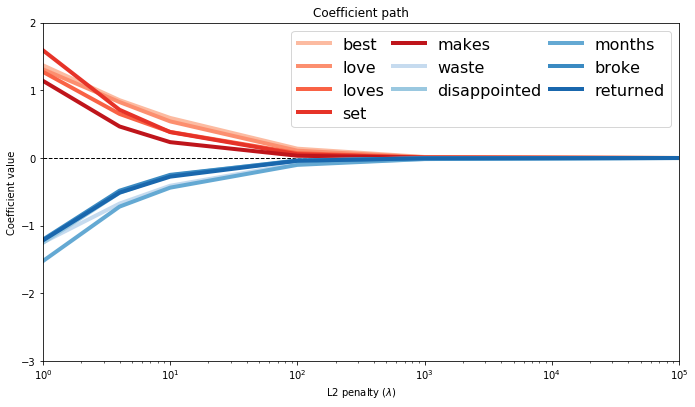

In [108]:
make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list=[1, 4, 10, 1e2, 1e3, 1e5])

**Quiz Question**: (**True**/False) Overall, all coefficients generally get smaller in size as the L2 penalty is increased.